In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Job_Role_Function

In [2]:
from datetime import datetime, timedelta

In [3]:
df1 = pd.read_excel(r"E:\Job_Market_Analysis\Kaggle_data\Data Analyst_Science\NaukriData_data analytics.xlsx")
df2 = pd.read_excel(r"E:\Job_Market_Analysis\Kaggle_data\Data Analyst_Science\NaukriData_Data Science.xlsx")

In [4]:
df = pd.concat([df1,df2], ignore_index=True)
df1.count()
df2.count()
df.count()

Job_Titles             53674
Company_Names          53706
Experience_Required    55756
Package_Details        57417
Locations              57406
Skills                 57152
Post_Url               52043
Post_Time              57430
dtype: int64

In [5]:
df.head()
df.rename(columns={'Job_Titles':'Job Title', 'Company_Names':'Company','Locations':'Location'}, inplace=True)

In [6]:
df.drop(columns=['Experience_Required','Package_Details','Post_Url'], inplace=True)
df.head()

,Job Title,Company,Location,Skills,Post_Time
0,"Lead Analyst, Data & Analytics",ANZ,Bangalore/Bengaluru,data cleansingData analysisAutomationData mana...,3 Days Ago
1,Director Data Analytics (Immediate Joiner pref...,Techneplus Software,"Noida, Uttar Pradesh, Bangalore/ Bengaluru, Ka...",Data ScienceData VisualizationData ModelingDat...,1 Day Ago
2,Data Analytics Lead,Gartner,Gurgaon/Gurugram,Process designChange managementProject managem...,1 Day Ago
3,Data Analytics Analyst,Leading Indian IT Company,"Noida, Mumbai, Bangalore/Bengaluru",Data AnalysisRSASPower BIData VisualizationTab...,2 Days Ago
4,Data Analytics Analyst,Foreign MNC in BPO,Jaipur,Data AnalyticsData EngineeringScalaHadoopOLAPS...,1 Day Ago


In [7]:
df['Post_Time'].replace("Few Hours Ago","0", inplace=True)
df['Post_Time'].replace("+"," ", inplace=True)

df.groupby('Post_Time').count()

C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\2972306040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Post_Time'].replace("Few Hours Ago","0", inplace=True)
C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\2972306040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,Job Title,Company,Location,Skills
Post_Time,,,,
0,837,837,1026,1026
1 Day Ago,6694,6695,7829,7820
10 Days Ago,1756,1756,1763,1756
11 Days Ago,1671,1671,1864,1860
12 Days Ago,114,114,114,111
13 Days Ago,129,129,130,129
14 Days Ago,460,461,463,461
15 Days Ago,546,546,552,547
16 Days Ago,424,424,427,417


In [8]:
def replace_value(row):
    value = 'start'
    if isinstance(row, str) and value in row.lower():
        return -1
    return row

In [9]:
df['Post_Time'] = df['Post_Time'].apply(replace_value)

In [10]:
df = df.loc[df['Post_Time'] != -1]

In [11]:
df['Post_Time'].replace("Just Now","0", inplace=True)
df['Post_Time'].replace("Today","0", inplace=True)

C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\1368022197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Post_Time'].replace("Just Now","0", inplace=True)
C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\1368022197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [12]:
df['Post_Time'].replace("null", -1, inplace = True)
df['Post_Time'].replace("30+ Days Ago", 32, inplace = True)
df = df.loc[df['Post_Time'] != "30+ Days Ago"]

C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\66383782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Post_Time'].replace("null", -1, inplace = True)
C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\66383782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [13]:
df.head()

,Job Title,Company,Location,Skills,Post_Time
0,"Lead Analyst, Data & Analytics",ANZ,Bangalore/Bengaluru,data cleansingData analysisAutomationData mana...,3 Days Ago
1,Director Data Analytics (Immediate Joiner pref...,Techneplus Software,"Noida, Uttar Pradesh, Bangalore/ Bengaluru, Ka...",Data ScienceData VisualizationData ModelingDat...,1 Day Ago
2,Data Analytics Lead,Gartner,Gurgaon/Gurugram,Process designChange managementProject managem...,1 Day Ago
3,Data Analytics Analyst,Leading Indian IT Company,"Noida, Mumbai, Bangalore/Bengaluru",Data AnalysisRSASPower BIData VisualizationTab...,2 Days Ago
4,Data Analytics Analyst,Foreign MNC in BPO,Jaipur,Data AnalyticsData EngineeringScalaHadoopOLAPS...,1 Day Ago


In [14]:
def time_convert(row):
    date = datetime.strptime("26-10-2023", "%d-%m-%Y")
    if isinstance(row, str):   
        subtract_days = int(row.split()[0])
        return date - timedelta(days=subtract_days)
    else: return date

In [15]:
df['Post_Time'] = df['Post_Time'].apply(time_convert)

In [16]:
df['Post_Time'].unique()
df.head()

,Job Title,Company,Location,Skills,Post_Time
0,"Lead Analyst, Data & Analytics",ANZ,Bangalore/Bengaluru,data cleansingData analysisAutomationData mana...,2023-10-23
1,Director Data Analytics (Immediate Joiner pref...,Techneplus Software,"Noida, Uttar Pradesh, Bangalore/ Bengaluru, Ka...",Data ScienceData VisualizationData ModelingDat...,2023-10-25
2,Data Analytics Lead,Gartner,Gurgaon/Gurugram,Process designChange managementProject managem...,2023-10-25
3,Data Analytics Analyst,Leading Indian IT Company,"Noida, Mumbai, Bangalore/Bengaluru",Data AnalysisRSASPower BIData VisualizationTab...,2023-10-24
4,Data Analytics Analyst,Foreign MNC in BPO,Jaipur,Data AnalyticsData EngineeringScalaHadoopOLAPS...,2023-10-25


In [17]:
df['Job_Role'] = df['Job Title'].apply(Job_Role_Function.map_job_role)

In [18]:
df.groupby('Job_Role').count()

,Job Title,Company,Location,Skills,Post_Time
Job_Role,,,,,
.Net Developer,25,25,25,25,25
AI Engineer,908,908,907,903,908
Android Developer,8,8,8,8,8
Backend Developer,21,21,21,21,21
Business Analyst,4840,4840,4838,4823,4840
C/C++ Developer,6,6,6,6,6
Civil Engineer,8,8,8,8,8
Cloud Engineer,181,181,180,179,181
Customer Support,18,18,18,18,18


In [19]:
df['Location'] = df['Location'].str.split(" ").str[0]
df['Location'] = df['Location'].str.split(',').str[0]
df['Location'] = df['Location'].str.split("-").str[0]
df['Location'] = df['Location'].str.split("/").str[0]

In [20]:
df.head()

,Job Title,Company,Location,Skills,Post_Time,Job_Role
0,"Lead Analyst, Data & Analytics",ANZ,Bangalore,data cleansingData analysisAutomationData mana...,2023-10-23,Data Analyst
1,Director Data Analytics (Immediate Joiner pref...,Techneplus Software,Noida,Data ScienceData VisualizationData ModelingDat...,2023-10-25,Data Analyst
2,Data Analytics Lead,Gartner,Gurgaon,Process designChange managementProject managem...,2023-10-25,Data Analyst
3,Data Analytics Analyst,Leading Indian IT Company,Noida,Data AnalysisRSASPower BIData VisualizationTab...,2023-10-24,Data Analyst
4,Data Analytics Analyst,Foreign MNC in BPO,Jaipur,Data AnalyticsData EngineeringScalaHadoopOLAPS...,2023-10-25,Data Analyst


In [21]:
df.to_excel("Main_Data_Analytics_Science_Data.xlsx", index=0)

# Using Seaborn and Matplotlib for Visualization

Visualizing top job roles.

C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\1579969470.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='Job_Role', data=top_roles, kind='count', palette='bright')


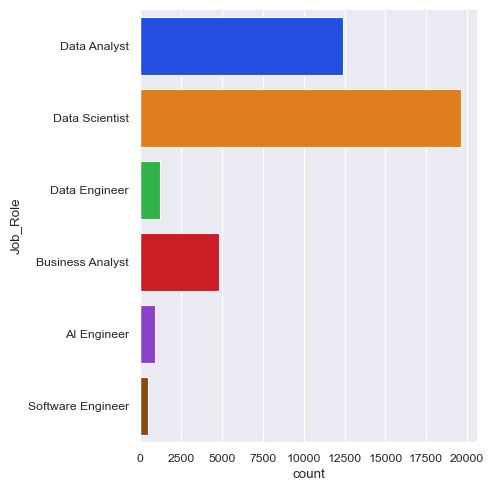

In [74]:
role_count = df['Job_Role'].value_counts()
top_roles_count = role_count[role_count > 400]
top_roles = df[df['Job_Role'].isin(top_roles_count.index)]

sns.set_style('darkgrid')
sns.catplot(y='Job_Role', data=top_roles, kind='count', palette='bright')

plt.savefig("Top Job Roles.png", bbox_inches = 'tight')

Visualizing Top cities with highest job openings

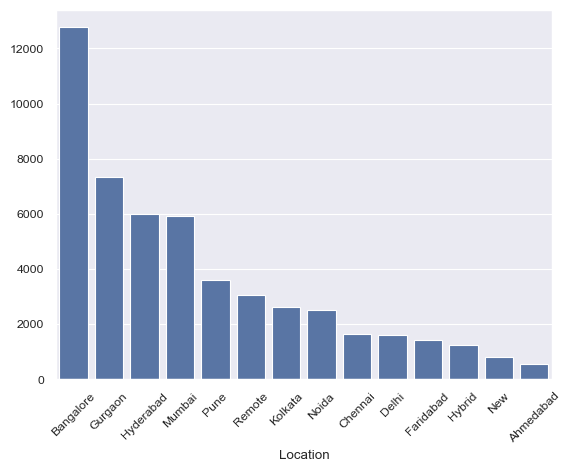

In [73]:
city_count = df['Location'].value_counts()
Top_cities = city_count[city_count>500]
Top_Cities_2 = df[df['Location'].isin(Top_cities.index)]

sns.barplot(x=Top_cities.index, y =Top_cities.values )
plt.xticks(rotation = 45)

plt.savefig("Top Cities with Job Openings.png", bbox_inches='tight')

Visualizing Job opening trend over time

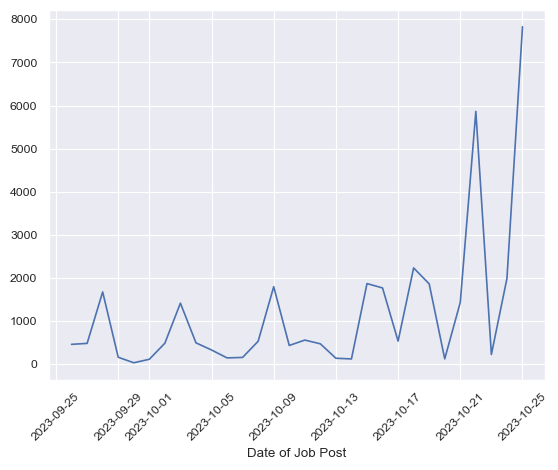

In [71]:
post_date = pd.to_datetime(df['Post_Time']).value_counts()
exclude_date = pd.to_datetime('2023-10-26')
related_dates = post_date[post_date.index != exclude_date]

sns.lineplot(x=related_dates.index, y = related_dates.values)
plt.xticks(rotation = 45)
plt.xlabel("Date of Job Post")

plt.savefig("Job Trend over time.png", bbox_inches = 'tight')

Top Jobs in Bangalore

C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_20736\103565029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_jobs_in_bangalore.sort_values(ascending=True).index,


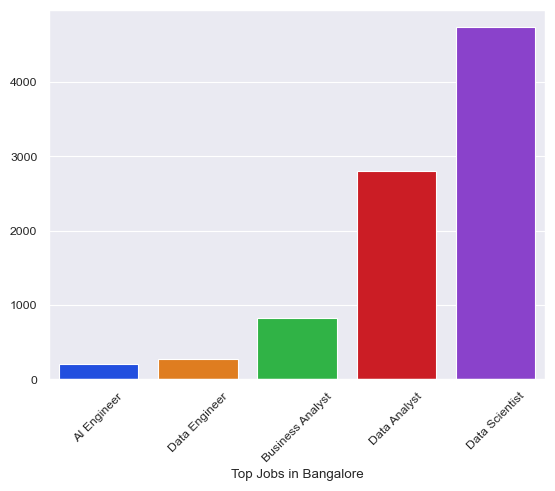

In [69]:
Bangalore_data = df[df['Location'] == 'Bangalore']
Top_jobs = Bangalore_data.groupby('Job_Role').size()
Top_jobs_in_bangalore = Top_jobs[Top_jobs.values > 200]

sns.barplot(x=Top_jobs_in_bangalore.sort_values(ascending=True).index, 
            y=Top_jobs_in_bangalore.sort_values(ascending=True).values,
            palette= 'bright')
sns.set_theme(style='darkgrid',context='paper')

plt.xticks(rotation = 45)
plt.xlabel("Top Jobs in Bangalore")
plt.savefig("Top_jobs_in_bangalore.png", bbox_inches = 'tight')